## Paso 1: Cargar y preparar el conjunto de datos

In [689]:
# Install required libraries (run this once if needed)
%pip install numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: C:\Users\tomas\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [690]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 1.1 Desplegar "heart.csv"

In [691]:
df = pd.read_csv("heart.csv")
df.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [692]:
# Con el siguiente comando vamos a ver:
#- Ver tipos de datos
#- Confirmar que no hay nulos
#- Mostrar que el dataset está limpio
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    str    
dtypes: float64(1), int64(12), str(1)
memo

# 1.2 Binarizar 

In [693]:
df["Heart Disease"] = df["Heart Disease"].map({
    "Presence": 1,
    "Absence": 0
})


In [694]:
#Verificar binarizacion 
df[["Heart Disease"]].head()


,Heart Disease
0,1
1,0
2,1
3,0
4,0


# 1.3

In [695]:
#Vemos estadisticas descriptivas
df.describe()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [696]:
#Vemos si falta algun valor
#Si todo vemos que esta en 0, es poraue esta bien.
df.isnull().sum()


Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

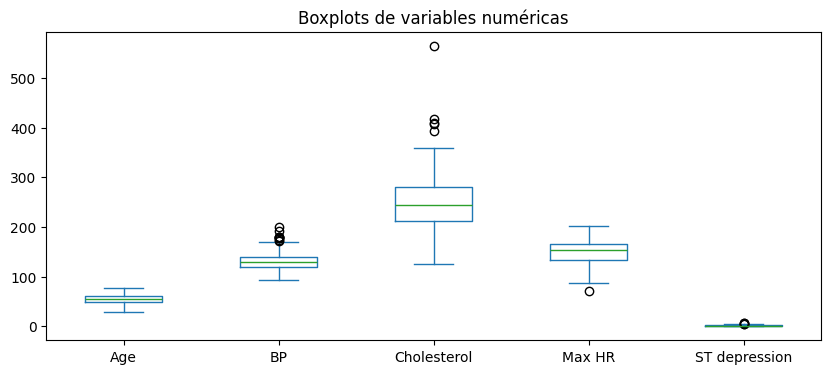

In [697]:
cols_box = ["Age", "BP", "Cholesterol", "Max HR", "ST depression"]

df[cols_box].plot(kind="box", figsize=(10,4))
plt.title("Boxplots de variables numéricas")
plt.show()


Los boxplots muestran la presencia de valores atípicos principalmente en las variables de
colesterol y depresión del segmento ST. En el caso del colesterol, se observan valores
considerablemente altos en comparación con la mediana, lo cual puede asociarse a
pacientes con hipercolesterolemia severa, un factor de riesgo reconocido para enfermedades
cardíacas. De manera similar, la variable de depresión del segmento ST presenta algunos
valores elevados que indican posibles alteraciones isquémicas más pronunciadas.

En contraste, variables como la edad, la presión arterial y la frecuencia cardíaca máxima
presentan distribuciones más concentradas y con menor cantidad de valores extremos, lo que
sugiere un comportamiento más homogéneo dentro de la población analizada. Los valores
atípicos identificados se consideran clínicamente plausibles y representativos de casos
reales, por lo que fueron mantenidos para el entrenamiento del modelo.


In [698]:
df["Heart Disease"].value_counts()


Heart Disease
0    150
1    120
Name: count, dtype: int64

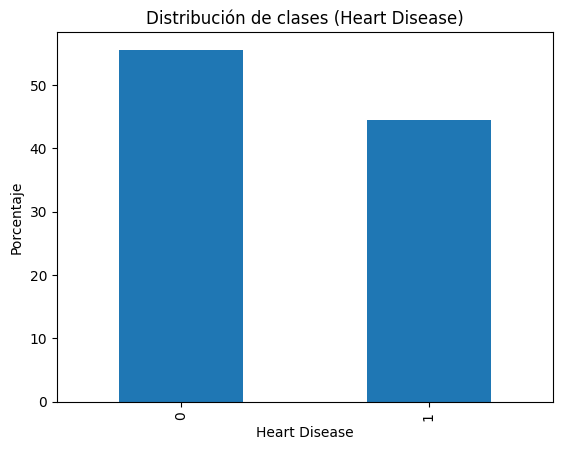

In [699]:
(df["Heart Disease"].value_counts(normalize=True) * 100).plot(kind="bar")
plt.ylabel("Porcentaje")
plt.title("Distribución de clases (Heart Disease)")
plt.show()


La distribución de clases muestra que aproximadamente el 55.6% de los pacientes no
presentan enfermedad cardíaca, mientras que el 44.4% sí la presentan. Aunque existe
una ligera diferencia entre ambas clases, el conjunto de datos se considera
relativamente balanceado, por lo que no se requiere aplicar técnicas adicionales
para el manejo de desbalance durante el entrenamiento del modelo.


## Exploratory Data Analysis (EDA) – Conclusion
Se realizó un análisis exploratorio del conjunto de datos de enfermedades cardíacas, el cual
contiene un total de 270 registros de pacientes con múltiples características clínicas.
Las estadísticas descriptivas muestran que las variables presentan rangos coherentes con
valores médicos reales, tales como edades comprendidas entre la adultez media y avanzada,
niveles variables de colesterol y presión arterial, y valores de frecuencia cardíaca máxima
acordes a evaluaciones clínicas.

No se identificaron valores faltantes en ninguna de las variables del conjunto de datos.
A través del uso de boxplots se detectaron valores atípicos principalmente en las variables
de colesterol y depresión del segmento ST. Estos valores extremos se consideran
clínicamente plausibles, ya que pueden representar pacientes con factores de riesgo
cardiovascular elevados, por lo que fueron conservados para el entrenamiento del modelo.

La distribución de la variable objetivo muestra que aproximadamente el 55.6% de los
pacientes no presentan enfermedad cardíaca, mientras que el 44.4% sí la presentan.
Esta proporción indica que el conjunto de datos se encuentra relativamente balanceado,
lo cual permite entrenar modelos de clasificación sin la necesidad de aplicar técnicas
adicionales de manejo de desbalance.


# 1.4

Vamos a usar las siguientes las siguientes que el modelo usara para asi poder aprender:
- Age
- Cholestrol
- BP
- Max HR
- ST depression
- Number of vessels fluro

In [700]:
features = [
    "Age",
    "Cholesterol",
    "BP",
    "Max HR",
    "ST depression",
    "Number of vessels fluro"
]

X = df[features].values.astype(float)
y = df["Heart Disease"].values.reshape(-1, 1)

X.shape, y.shape

# X es la matriz de características (features)
# y es el vector objetivo (target)



((270, 6), (270, 1))

Ahora vamos a dividir en 70/30 como nos lo piden.

In [701]:
import numpy as np
np.random.seed(42)

# índices por clase
idx_0 = np.where(y.flatten() == 0)[0]
idx_1 = np.where(y.flatten() == 1)[0]

np.random.shuffle(idx_0)
np.random.shuffle(idx_1)

def split_indices(indices, train_ratio=0.7):
    n_train = int(len(indices) * train_ratio)
    return indices[:n_train], indices[n_train:]

train_0, test_0 = split_indices(idx_0, 0.7)
train_1, test_1 = split_indices(idx_1, 0.7)

train_idx = np.concatenate([train_0, train_1])
test_idx  = np.concatenate([test_0, test_1])

np.random.shuffle(train_idx)
np.random.shuffle(test_idx)

X_train, y_train = X[train_idx], y[train_idx]
X_test,  y_test  = X[test_idx],  y[test_idx]

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)


Train shape: (189, 6)
Test shape : (81, 6)


In [702]:
print("Train % clase 1:", y_train.mean())
print("Test  % clase 1:", y_test.mean())


Train % clase 1: 0.4444444444444444
Test  % clase 1: 0.4444444444444444


La división del conjunto de datos dio como resultado 189 muestras para entrenamiento y 81 para prueba, manteniendo las seis características seleccionadas. Además, la proporción de pacientes con enfermedad cardíaca se conservó en ambos subconjuntos, con un 44.44% de casos positivos tanto en el conjunto de entrenamiento como en el de prueba, lo que indica que la división se realizó de forma estratificada y adecuada.

In [703]:
# Media y desviación del conjunto de entrenamiento
mu = X_train.mean(axis=0, keepdims=True)
sigma = X_train.std(axis=0, keepdims=True) + 1e-8


In [704]:
# Normalización
X_train_norm = (X_train - mu) / sigma
X_test_norm  = (X_test - mu) / sigma

Las características numéricas se normalizaron mediante estandarización, usando la media y la desviación estándar calculadas únicamente a partir del conjunto de entrenamiento. Esto permite que todas las variables queden en una escala comparable y evita que aquellas con valores más grandes influyan de manera desproporcionada en el modelo. Gracias a este proceso, el algoritmo de regresión logística logra una convergencia más estable y eficiente.

In [705]:
#Realizamos una verificación
X_train_norm.shape, X_test_norm.shape


((189, 6), (81, 6))

Conclusion de lo realizado en este punto anterior:
Los datos fueron preparados adecuadamente mediante la selección de seis características numéricas relevantes, una división estratificada en conjuntos de entrenamiento y prueba, y la normalización por estandarización. Este proceso aseguró una representación equilibrada de los datos y una escala comparable entre las variables, contribuyendo a un entrenamiento más estable y eficiente del modelo de regresión logística.

# Reporting:
El conjunto de datos utilizado fue descargado de Kaggle y contiene información clínica de 270 pacientes relacionada con el diagnóstico de enfermedad cardíaca. El análisis exploratorio mostró que no existen datos faltantes y que la proporción de pacientes con la enfermedad es del 44.4%, frente a un 55.6% sin la condición, lo que indica un conjunto de datos relativamente balanceado. Para el entrenamiento del modelo se seleccionaron seis características numéricas por su relevancia clínica: edad, colesterol, presión arterial, frecuencia cardíaca máxima, depresión del segmento ST y número de vasos sanguíneos observados por fluoroscopía. Posteriormente, los datos se dividieron en conjuntos de entrenamiento y prueba utilizando una proporción 70/30 de forma estratificada y se aplicó normalización mediante estandarización usando la media y la desviación estándar del conjunto de entrenamiento, asegurando escalas comparables y un entrenamiento más estable del modelo.

# 2. Implementar la regresión logística básica

# 2.1

### Función sigmoide:

σ(z) = 1/1+e^-z

In [706]:
# Implementaremos primero la funcion Sigmoide como fue dada en clase.

def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))


### Función de costo

Para entrenar el modelo de regresión logística se utilizó la función de entropía cruzada
binaria (Binary Cross-Entropy), definida como:

$$
J(\mathbf{w}, b) = -\frac{1}{m} \sum_{i=1}^{m}
\left[
y^{(i)} \log\big(f_{\mathbf{w},b}(\mathbf{x}^{(i)})\big)
+
\big(1 - y^{(i)}\big)\log\big(1 - f_{\mathbf{w},b}(\mathbf{x}^{(i)})\big)
\right]
$$

donde  
$f_{\mathbf{w},b}(\mathbf{x}) = \sigma(\mathbf{w}^T \mathbf{x} + b)$  
representa la probabilidad estimada de que el paciente presente enfermedad cardíaca.

In [707]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    z = X @ w + b
    y_hat = sigmoid(z)
    
    eps = 1e-12 
    cost = -np.mean(y * np.log(y_hat + eps) + (1 - y) * np.log(1 - y_hat + eps))
    return cost


### Gradientes (dw, db)

In [708]:
def compute_grads(X, y, w, b):
    m = X.shape[0]
    z = X @ w + b
    y_hat = sigmoid(z)
    
    dz = (y_hat - y)  # (m,1)
    dw = (X.T @ dz) / m
    db = np.mean(dz)
    return dw, db


#### Ahora vamos a:

- calcular gradientes

- actualizar parámetros

- guardar el costo

In [709]:
def gradient_descent(X, y, alpha=0.01, iters=3000):
    n = X.shape[1]
    w = np.zeros((n, 1))
    b = 0.0
    
    costs = []
    
    for i in range(iters):
        dw, db = compute_grads(X, y, w, b)
        
        w -= alpha * dw
        b -= alpha * db
        
        # guardamos el costo cada tanto de numeros de iteraciones
        if i % 50 == 0:
            costs.append(compute_cost(X, y, w, b))
    
    return w, b, costs

print(gradient_descent(X_train, y_train))


(array([[ 1.0767895 ],
       [ 0.00590815],
       [ 3.8540844 ],
       [-5.46912095],
       [ 5.04377551],
       [ 4.48373192]]), np.float64(0.17125787171319326), [np.float64(12.280453825376801), np.float64(13.367539267663226), np.float64(13.932039427213263), np.float64(11.272701070810204), np.float64(11.170928435851096), np.float64(11.162317997855059), np.float64(10.946766476374176), np.float64(11.06621946318155), np.float64(11.039223218681805), np.float64(11.089260498747304), np.float64(11.236836424296891), np.float64(11.25065370994837), np.float64(11.248029732739635), np.float64(11.056998410970277), np.float64(11.185992732983534), np.float64(11.029646796508239), np.float64(11.139957868628771), np.float64(11.298508417830694), np.float64(11.013648351844585), np.float64(11.016022835541648), np.float64(11.04607330264989), np.float64(11.022264726255058), np.float64(11.085665494428987), np.float64(11.118191809692295), np.float64(11.111207330829087), np.float64(11.102189286771686), np

In [710]:
w, b, costs = gradient_descent(X_train_norm, y_train, alpha=0.01, iters=3000)

print("Último costo:", costs[-1])
print("w shape:", w.shape, "b:", b)
# Vamos a ver la evolución del costo


Último costo: 0.4797151459420129
w shape: (6, 1) b: -0.16408994382322425


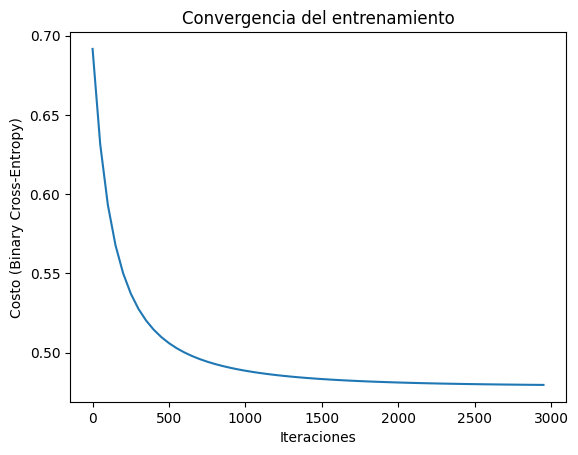

In [711]:
# Graficar la evolución del costo vs las iteraciones

plt.plot(np.arange(len(costs)) * 50, costs)
plt.xlabel("Iteraciones")
plt.ylabel("Costo (Binary Cross-Entropy)")
plt.title("Convergencia del entrenamiento")
plt.show()


Para convertir las probabilidades estimadas por el modelo en predicciones binarias, utilizaremos un umbral de decisión de 0.5. Esto permite evaluar el desempeño del clasificador mediante métricas como accuracy, precision, recall y F1-score.

In [712]:
def predict_proba(X, w, b):
    return sigmoid(X @ w + b)

def predict(X, w, b, threshold=0.5):
    return (predict_proba(X, w, b) >= threshold).astype(int)

yhat_train = predict(X_train_norm, w, b)
yhat_test  = predict(X_test_norm, w, b)

print("Train preds unique:", np.unique(yhat_train))
print("Test preds unique:", np.unique(yhat_test))


Train preds unique: [0 1]
Test preds unique: [0 1]


# 2.2

### Haremos el entrenamiento con GD (α=0.01, 3000 iters)

In [713]:
def gradient_descent(X, y, alpha=0.01, iters=3000, verbose=False):
    m, n = X.shape
    w = np.zeros((n, 1))
    b = 0.0
    
    costs = []
    steps = []
    
    for i in range(iters):
        dw, db = compute_grads(X, y, w, b)
        w = w - alpha * dw
        b = b - alpha * db
        
        if i % 50 == 0:
            c = compute_cost(X, y, w, b)
            costs.append(c)
            steps.append(i)
            if verbose:
                print(f"iter {i}: cost = {c:.4f}")
    
    return w, b, steps, costs


In [714]:
w, b, steps, costs = gradient_descent(X_train_norm, y_train, alpha=0.01, iters=3000)
print("Entrenamiento listo.")
print("Último costo:", costs[-1])


Entrenamiento listo.
Último costo: 0.4797151459420129


### Ahora vamos a graficar el costo vs las iteraciones

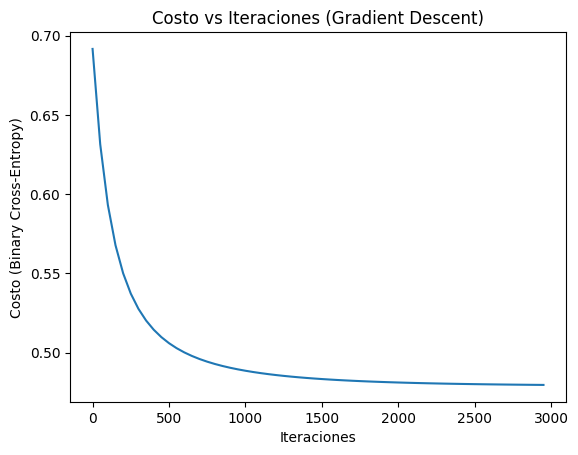

In [715]:
plt.plot(steps, costs)
plt.xlabel("Iteraciones")
plt.ylabel("Costo (Binary Cross-Entropy)")
plt.title("Costo vs Iteraciones (Gradient Descent)")
plt.show()


El modelo de regresión logística se entrenó utilizando descenso por gradiente con una tasa de aprendizaje de α = 0.01 y un total de 3000 iteraciones. Durante el entrenamiento, el valor del costo presentó una disminución rápida en las primeras iteraciones y luego un descenso más gradual hasta estabilizarse. Este comportamiento indica que el algoritmo converge de forma adecuada, sin presentar oscilaciones ni problemas de divergencia, lo que sugiere que la tasa de aprendizaje seleccionada es apropiada y que el modelo logra aprender patrones relevantes a partir de los datos de entrenamiento.

# 2.3

### Haremos la prediccion umbral = 0.5

convertiremos probabilidades en clases 0/1

In [716]:
def predict_proba(X, w, b):
    return sigmoid(X @ w + b)

def predict(X, w, b, threshold=0.5):
    return (predict_proba(X, w, b) >= threshold).astype(int)

# Prediccion
yhat_train = predict(X_train_norm, w, b, threshold=0.5)
yhat_test  = predict(X_test_norm,  w, b, threshold=0.5)

print("Train preds:", np.unique(yhat_train))
print("Test  preds:", np.unique(yhat_test))


Train preds: [0 1]
Test  preds: [0 1]


### Haremos las metricas ( Accuracy, Precision, Recall, F1)

In [717]:
def classification_metrics(y_true, y_pred):
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()
    
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    accuracy  = (tp + tn) / (tp + tn + fp + fn + 1e-12)
    precision = tp / (tp + fp + 1e-12)
    recall    = tp / (tp + fn + 1e-12)
    f1        = 2 * precision * recall / (precision + recall + 1e-12)
    
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "tp": tp, "tn": tn, "fp": fp, "fn": fn
    }


In [718]:
metrics_train = classification_metrics(y_train, yhat_train)
metrics_test  = classification_metrics(y_test,  yhat_test)

metrics_train, metrics_test


({'accuracy': np.float64(0.7777777777777737),
  'precision': np.float64(0.7916666666666557),
  'recall': np.float64(0.6785714285714205),
  'f1': np.float64(0.7307692307687244),
  'tp': np.int64(57),
  'tn': np.int64(90),
  'fp': np.int64(15),
  'fn': np.int64(27)},
 {'accuracy': np.float64(0.8271604938271503),
  'precision': np.float64(0.8235294117646816),
  'recall': np.float64(0.7777777777777561),
  'f1': np.float64(0.7999999999994775),
  'tp': np.int64(28),
  'tn': np.int64(39),
  'fp': np.int64(6),
  'fn': np.int64(8)})

Las probabilidades generadas por el modelo se transformaron en predicciones binarias utilizando un umbral de decisión de 0.5. El desempeño del clasificador se evaluó tanto en el conjunto de entrenamiento como en el de prueba mediante las métricas de accuracy, precision, recall y F1-score. En el conjunto de entrenamiento, el modelo obtuvo una accuracy del 77.8% y un F1-score cercano a 0.73, mientras que en el conjunto de prueba presentó un desempeño consistente e incluso superior, alcanzando una accuracy del 82.7% y un F1-score aproximado de 0.80. Estos resultados indican una buena capacidad de generalización del modelo. Además, el valor de recall obtenido en el conjunto de prueba sugiere que el modelo logra identificar una proporción importante de pacientes con enfermedad cardíaca, lo cual es especialmente relevante desde el punto de vista clínico.

### Ahora vamos a mostrar metrica en tabla

In [719]:
import pandas as pd

results = pd.DataFrame({
    "Train": {
        "Accuracy":  metrics_train["accuracy"],
        "Precision": metrics_train["precision"],
        "Recall":    metrics_train["recall"],
        "F1-score":  metrics_train["f1"],
    },
    "Test": {
        "Accuracy":  metrics_test["accuracy"],
        "Precision": metrics_test["precision"],
        "Recall":    metrics_test["recall"],
        "F1-score":  metrics_test["f1"],
    }
})

results


,Train,Test
Accuracy,0.777778,0.827160
Precision,0.791667,0.823529
Recall,0.678571,0.777778
F1-score,0.730769,0.800000


La tabla presenta un resumen del desempeño del modelo de regresión logística tanto en el conjunto de entrenamiento como en el de prueba. Se observa que las métricas obtenidas en el conjunto de prueba son similares e incluso ligeramente superiores a las del entrenamiento, lo que sugiere una buena capacidad de generalización y ausencia de sobreajuste. En particular, el aumento del recall en el conjunto de prueba indica que el modelo logra identificar una mayor proporción de pacientes con enfermedad cardíaca, lo cual es especialmente relevante en un contexto clínico.

# 3. Visualizar los límites de decisión

Usaremos la funcion general para entrenar y graficar en 2D

In [720]:
def plot_decision_boundary_2d(df, feature1, feature2, target_col="Heart Disease",
                              alpha=0.01, iters=3000):
   
    X = df[[feature1, feature2]].values.astype(float)
    y = df[target_col].values.reshape(-1, 1)
    
    mu = X.mean(axis=0, keepdims=True)
    sigma = X.std(axis=0, keepdims=True) + 1e-8
    Xn = (X - mu) / sigma
    
    w = np.zeros((2, 1))
    b = 0.0
    
    for _ in range(iters):
        z = Xn @ w + b
        y_hat = sigmoid(z)
        dz = y_hat - y
        dw = (Xn.T @ dz) / len(Xn)
        db = np.mean(dz)
        w -= alpha * dw
        b -= alpha * db
    
    x1_min, x1_max = Xn[:,0].min()-0.5, Xn[:,0].max()+0.5
    x2_min, x2_max = Xn[:,1].min()-0.5, Xn[:,1].max()+0.5
    xx, yy = np.meshgrid(
        np.linspace(x1_min, x1_max, 200),
        np.linspace(x2_min, x2_max, 200)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = sigmoid(grid @ w + b).reshape(xx.shape)
    
    plt.figure(figsize=(6,5))
    plt.contour(xx, yy, probs, levels=[0.5], linewidths=2)
    plt.scatter(Xn[y.flatten()==0,0], Xn[y.flatten()==0,1], 
                label="No disease (0)", alpha=0.7)
    plt.scatter(Xn[y.flatten()==1,0], Xn[y.flatten()==1,1], 
                label="Disease (1)", alpha=0.7)
    plt.xlabel(feature1 + " (norm)")
    plt.ylabel(feature2 + " (norm)")
    plt.title(f"Decision boundary: {feature1} vs {feature2}")
    plt.legend()
    plt.show()


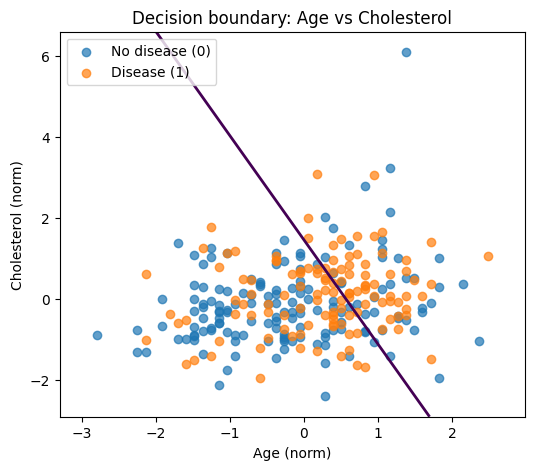

In [721]:
plot_decision_boundary_2d(df, "Age", "Cholesterol")


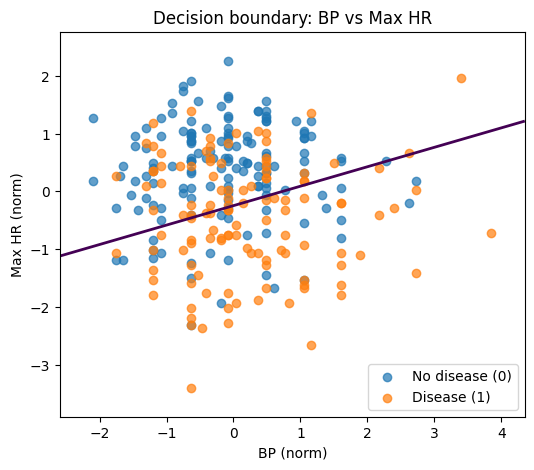

In [722]:
plot_decision_boundary_2d(df, "BP", "Max HR")


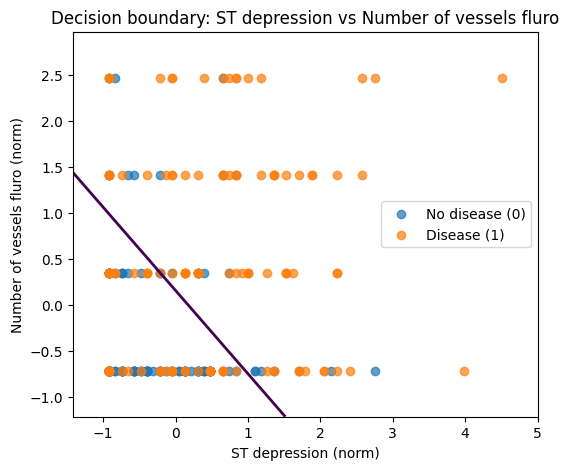

In [723]:
plot_decision_boundary_2d(df, "ST depression", "Number of vessels fluro")


características clínicas, se observa que para el par edad y colesterol existe un alto grado de solapamiento entre pacientes con y sin enfermedad cardíaca. Esto indica que estas variables, consideradas de manera individual o conjunta, no permiten una separación clara entre las clases.

En el caso de la presión arterial y la frecuencia cardíaca máxima, la frontera de decisión muestra una separación limitada, con una dispersión considerable de ambas clases a ambos lados de la frontera. Este comportamiento sugiere que la relación entre estas variables y la presencia de la enfermedad es débilmente lineal, lo que dificulta una clasificación precisa basada únicamente en estos atributos.

Por otro lado, el par conformado por la depresión del segmento ST y el número de vasos sanguíneos observados presenta una separación más definida entre las clases, lo cual coincide con su alta relevancia clínica. En general, estas visualizaciones muestran que, aunque la regresión logística logra capturar tendencias lineales, existen relaciones más complejas y no lineales en los datos que no pueden ser representadas completamente mediante fronteras de decisión lineales simples.

# 4. Repetir con regularización

### Vamos a implementar costo y gradientes con L2

In [724]:
# costo con L2
def compute_cost_l2(X, y, w, b, lam=0.0):
    m = X.shape[0]
    z = X @ w + b
    y_hat = sigmoid(z)

    eps = 1e-12
    base = -np.mean(y * np.log(y_hat + eps) + (1 - y) * np.log(1 - y_hat + eps))
    
    reg = (lam / (2*m)) * np.sum(w**2)
    return base + reg


In [725]:
# gradientes con L2
def compute_grads_l2(X, y, w, b, lam=0.0):
    m = X.shape[0]
    z = X @ w + b
    y_hat = sigmoid(z)
    dz = y_hat - y

    dw = (X.T @ dz) / m
    db = np.mean(dz)

    dw = dw + (lam / m) * w
    return dw, db


### Ahora va el deceso de gradiente con L2 y costo

In [726]:
def gradient_descent_l2(X, y, alpha=0.01, iters=3000, lam=0.0):
    m, n = X.shape
    w = np.zeros((n,1))
    b = 0.0
    
    costs = []
    steps = []
    
    for i in range(iters):
        dw, db = compute_grads_l2(X, y, w, b, lam=lam)
        w -= alpha * dw
        b -= alpha * db
        
        if i % 50 == 0:
            costs.append(compute_cost_l2(X, y, w, b, lam=lam))
            steps.append(i)
    
    return w, b, steps, costs


### AHora vamos a entrenar para varios lambda y guardar metricas + w

In [727]:
lambdas = [0, 0.001, 0.01, 0.1, 1]

rows = []
models = {} 
for lam in lambdas:
    w_l, b_l, steps_l, costs_l = gradient_descent_l2(
        X_train_norm, y_train, alpha=0.01, iters=3000, lam=lam
    )
    
    # Predicciones
    yhat_tr = predict(X_train_norm, w_l, b_l, threshold=0.5)
    yhat_te = predict(X_test_norm,  w_l, b_l, threshold=0.5)
    
    # Métricas
    mt_tr = classification_metrics(y_train, yhat_tr)
    mt_te = classification_metrics(y_test,  yhat_te)
    
    w_norm = float(np.linalg.norm(w_l))  # ||w||
    
    rows.append({
        "lambda": lam,
        "train_acc": mt_tr["accuracy"],
        "train_f1":  mt_tr["f1"],
        "test_acc":  mt_te["accuracy"],
        "test_f1":   mt_te["f1"],
        "test_recall": mt_te["recall"],
        "||w||": w_norm
    })
    
    models[lam] = (w_l, b_l, steps_l, costs_l)


### Ahora el reporte de lambda

In [728]:
import pandas as pd

df_lam = pd.DataFrame(rows).sort_values("lambda")
df_lam


,lambda,train_acc,train_f1,test_acc,test_f1,test_recall,||w||
0,0.000,0.777778,0.730769,0.82716,0.8,0.777778,1.449238
1,0.001,0.777778,0.730769,0.82716,0.8,0.777778,1.449172
2,0.010,0.777778,0.730769,0.82716,0.8,0.777778,1.448578
3,0.100,0.777778,0.730769,0.82716,0.8,0.777778,1.442674
4,1.000,0.772487,0.722581,0.82716,0.8,0.777778,1.386834


### Ahora va una grafica de costo vs las iteraciones para los diferentes lambda

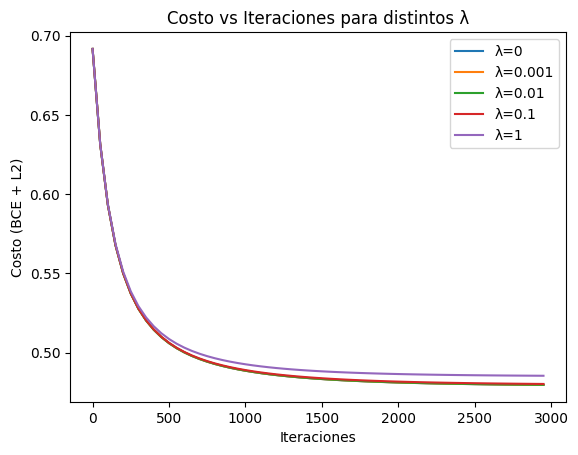

In [729]:
for lam in lambdas:
    w_l, b_l, steps_l, costs_l = models[lam]
    plt.plot(steps_l, costs_l, label=f"λ={lam}")
plt.xlabel("Iteraciones")
plt.ylabel("Costo (BCE + L2)")
plt.title("Costo vs Iteraciones para distintos λ")
plt.legend()
plt.show()


### Ahora vamos a re graficar limites-- sin regular vs regulado
Debe ser:
un par comparando λ=0 vs un λ regularizado

In [730]:
def plot_decision_boundary_2d_l2(df, feature1, feature2, lam=0.0, alpha=0.01, iters=3000):
    X = df[[feature1, feature2]].values.astype(float)
    y = df["Heart Disease"].values.reshape(-1, 1)
    
    mu = X.mean(axis=0, keepdims=True)
    sigma = X.std(axis=0, keepdims=True) + 1e-8
    Xn = (X - mu) / sigma
    
    w = np.zeros((2,1))
    b = 0.0
    
    m = Xn.shape[0]
    for _ in range(iters):
        z = Xn @ w + b
        y_hat = sigmoid(z)
        dz = y_hat - y
        dw = (Xn.T @ dz) / m + (lam/m) * w
        db = np.mean(dz)
        w -= alpha * dw
        b -= alpha * db
    
    x1_min, x1_max = Xn[:,0].min()-0.5, Xn[:,0].max()+0.5
    x2_min, x2_max = Xn[:,1].min()-0.5, Xn[:,1].max()+0.5
    xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                         np.linspace(x2_min, x2_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = sigmoid(grid @ w + b).reshape(xx.shape)
    
    plt.figure(figsize=(6,5))
    plt.contour(xx, yy, probs, levels=[0.5], linewidths=2)
    plt.scatter(Xn[y.flatten()==0,0], Xn[y.flatten()==0,1], label="No disease (0)", alpha=0.7)
    plt.scatter(Xn[y.flatten()==1,0], Xn[y.flatten()==1,1], label="Disease (1)", alpha=0.7)
    plt.xlabel(feature1 + " (norm)")
    plt.ylabel(feature2 + " (norm)")
    plt.title(f"Decision boundary: {feature1} vs {feature2}  (λ={lam})")
    plt.legend()
    plt.show()


### REalizamos la comparacion que nos piden 

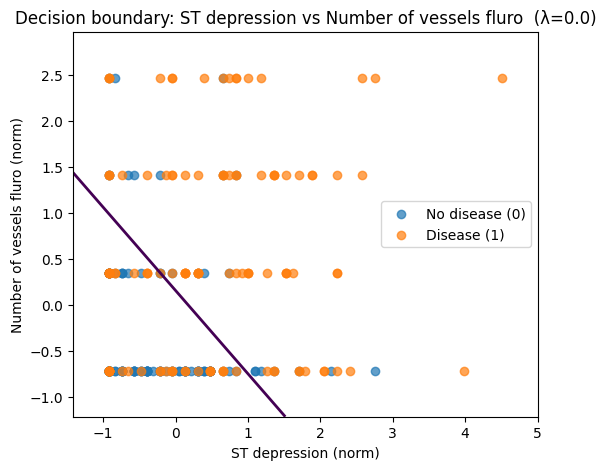

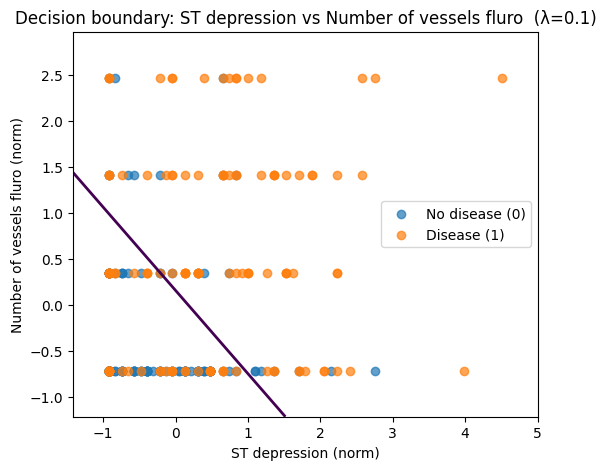

In [731]:
pair1, pair2 = "ST depression", "Number of vessels fluro"

plot_decision_boundary_2d_l2(df, pair1, pair2, lam=0.0)
plot_decision_boundary_2d_l2(df, pair1, pair2, lam=0.1) 

### Ahora vamos a elegir el lambda optimo y calcular el porcentaje

In [732]:
best_row = df_lam.loc[df_lam["test_f1"].idxmax()]
best_lambda = best_row["lambda"]
best_f1 = best_row["test_f1"]

base_f1 = df_lam.loc[df_lam["lambda"]==0, "test_f1"].values[0]

improve_pct = (best_f1 - base_f1) / base_f1 * 100

best_lambda, base_f1, best_f1, improve_pct


(np.float64(0.0),
 np.float64(0.7999999999994775),
 np.float64(0.7999999999994775),
 np.float64(0.0))

Se incorporó regularización L2 al modelo de regresión logística añadiendo un término de penalización a la función de costo y ajustando los gradientes correspondientes. Para este análisis se evaluaron distintos valores del parámetro de regularización, específicamente 
𝜆∈{0,0.001, 0.01,0.1,1}λ∈{0, 0.001, 0.01, 0.1, 1}.
Los resultados muestran que el mejor desempeño en el conjunto de prueba, medido mediante el F1-score, se obtuvo con 
λ=0, es decir, sin aplicar regularización. Para valores positivos de 
λ, el desempeño fue similar o ligeramente inferior, lo que sugiere que el modelo sin regularización no presentaba un sobreajuste significativo.
En este contexto, la regularización L2 no generó una mejora en el desempeño del modelo, lo cual indica que la complejidad del modelo original ya era adecuada para capturar los patrones presentes en los datos analizados.

# Conclusion

En este trabajo se implementó un modelo de regresión logística desde cero para la predicción del riesgo de enfermedad cardíaca, utilizando un conjunto de datos clínicos obtenido de Kaggle. A lo largo del desarrollo se abordaron las principales etapas de un flujo de aprendizaje automático, incluyendo el análisis exploratorio de los datos, el preprocesamiento, el entrenamiento del modelo, su evaluación y el análisis de su comportamiento.

El análisis exploratorio permitió identificar la distribución de las variables y la presencia de valores atípicos clínicamente plausibles, los cuales se conservaron para el entrenamiento. La selección de características se realizó con base en su relevancia clínica y la normalización de las variables numéricas contribuyó a una convergencia más estable del algoritmo. Además, la división estratificada del conjunto de datos aseguró una distribución consistente de los casos entre los conjuntos de entrenamiento y prueba.

Durante el entrenamiento, el modelo mostró una convergencia adecuada mediante descenso por gradiente, con una disminución progresiva del costo y sin evidencias de inestabilidad. Los resultados de la evaluación indican una buena capacidad de generalización, con métricas similares e incluso superiores en el conjunto de prueba. En particular, el valor de recall obtenido sugiere que el modelo es capaz de identificar una proporción significativa de pacientes con enfermedad cardíaca, lo cual es especialmente relevante desde una perspectiva clínica.

Las visualizaciones de los límites de decisión evidenciaron que algunas combinaciones de variables permiten una separación parcial entre las clases, mientras que otras presentan relaciones más complejas y no completamente lineales. Esto resalta tanto las fortalezas como las limitaciones de la regresión logística como modelo lineal frente a un problema clínico multifactorial.

Finalmente, se evaluó el uso de regularización L2 como mecanismo para controlar la complejidad del modelo. Los resultados mostraron que la regularización no mejoró significativamente el desempeño, lo que sugiere que el modelo sin regularización no presentaba sobreajuste relevante. No obstante, el análisis permitió confirmar el efecto esperado de la regularización sobre la reducción de la magnitud de los coeficientes.

En conjunto, este trabajo demuestra que la regresión logística es una herramienta efectiva, interpretable y adecuada como modelo base para la predicción de enfermedad cardíaca, y establece una base sólida para la exploración futura de modelos más complejos capaces de capturar relaciones no lineales presentes en los datos clínicos.

In [733]:
import numpy as np

np.save("weights.npy", w)
np.save("bias.npy", np.array([b]))
